<a href="https://colab.research.google.com/github/pyaswanth/Life-Expectancy-Prediction/blob/main/Life_Expectancy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
data = pd.read_csv('Life Expectancy Data.csv')

In [ ]:
data.head(100)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Argentina,2000,Developing,74.1,137.0,12,7.68,1349.025282,NaN,6,...,88.0,9.21,83.0,0.1,7669.273916,3757452.0,1.2,1.1,0.764,15.0
96,Armenia,2015,Developing,74.8,118.0,1,NaN,0.000000,94.0,33,...,96.0,NaN,94.0,0.1,369.654776,291695.0,2.1,2.2,0.741,12.7
97,Armenia,2014,Developing,74.6,12.0,1,3.91,295.608714,93.0,13,...,95.0,4.48,93.0,0.1,3994.712355,29622.0,2.1,2.1,0.739,12.7
98,Armenia,2013,Developing,74.4,123.0,1,3.79,279.429081,95.0,10,...,96.0,4.55,95.0,0.1,3843.591213,289359.0,2.1,2.1,0.736,12.7


In [ ]:
data.shape

(2938, 22)

In [ ]:
len(data['Country'].unique())

193

In [ ]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:

df= data.rename(columns={"Country": "country", "Year": "year", "Status": "status", "Life expectancy ":"life_expectancy",	
                         "Adult Mortality": "adult_mortality", "infant deaths":"infant_deaths", "Alcohol": "alcohol", 
                         "percentage expenditure": "percentage_expenditure",	"Hepatitis B": "hepatitisb", "Measles ": "measles",	
                         " BMI ": "bmi", "under-five deaths ": "under_five_deaths", "Polio": "polio", "Total expenditure": "total_expenditure", 
                         "Diphtheria ": "diptheria",	" HIV/AIDS": "hiv/aids", "GDP":"gdp", "Population":"population", 
                         " thinness  1-19 years": "thinness_10to19_years", " thinness 5-9 years": "thinness_5to9_years", 
                         "Income composition of resources":"income_comp_of_resources", "Schooling":"schooling"})
 

In [ ]:
df.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitisb,measles,...,polio,total_expenditure,diptheria,hiv/aids,gdp,population,thinness_10to19_years,thinness_5to9_years,income_comp_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


**Missing Values**

In [ ]:

total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
missing_values = pd.concat([total, percent], axis = 1, keys = ['total_missing', 'percent_missing'])
missing_values.head(15)

,total_missing,percent_missing
population,652,0.221920
hepatitisb,553,0.188223
gdp,448,0.152485
total_expenditure,226,0.076923
alcohol,194,0.066031
income_comp_of_resources,167,0.056841
schooling,163,0.055480
bmi,34,0.011572
thinness_10to19_years,34,0.011572
thinness_5to9_years,34,0.011572


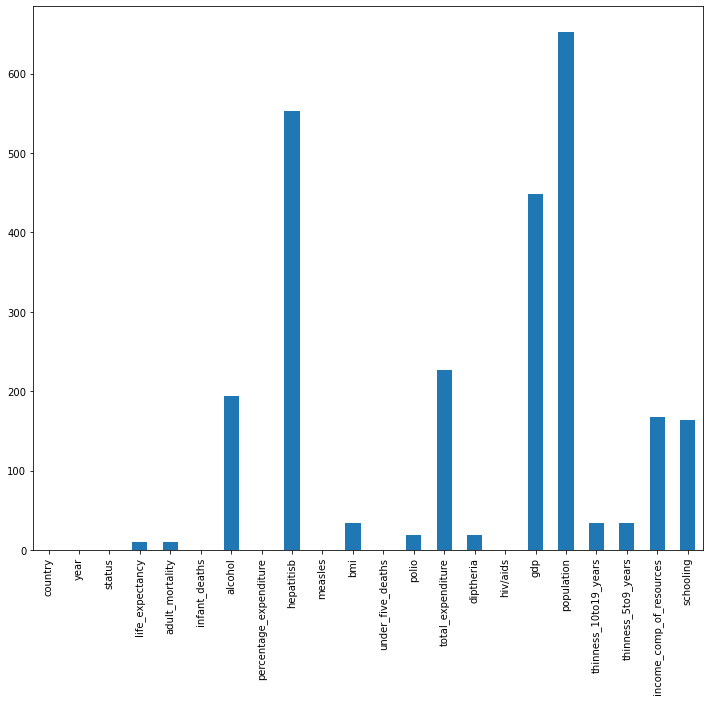

In [ ]:

plt.figure(figsize=(12,10))
df.isnull().sum().plot(kind='bar')

In [ ]:
for column in missing_values.index[:15]:
    df[column].fillna(df[column].median(), inplace=True)

In [ ]:
df.isnull().sum()

country                     0
year                        0
status                      0
life_expectancy             0
adult_mortality             0
infant_deaths               0
alcohol                     0
percentage_expenditure      0
hepatitisb                  0
measles                     0
bmi                         0
under_five_deaths           0
polio                       0
total_expenditure           0
diptheria                   0
hiv/aids                    0
gdp                         0
population                  0
thinness_10to19_years       0
thinness_5to9_years         0
income_comp_of_resources    0
schooling                   0
dtype: int64

In [ ]:
numerical_columns= df.select_dtypes(exclude=['object'])
categorical_columns = df.select_dtypes(include=['object'])

In [ ]:
numerical_columns

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitisb,measles,bmi,under_five_deaths,polio,total_expenditure,diptheria,hiv/aids,gdp,population,thinness_10to19_years,thinness_5to9_years,income_comp_of_resources,schooling
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2001,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [ ]:
categorical_columns

,country,status
0,Afghanistan,Developing
1,Afghanistan,Developing
2,Afghanistan,Developing
3,Afghanistan,Developing
4,Afghanistan,Developing
...,...,...
2933,Zimbabwe,Developing
2934,Zimbabwe,Developing
2935,Zimbabwe,Developing
2936,Zimbabwe,Developing


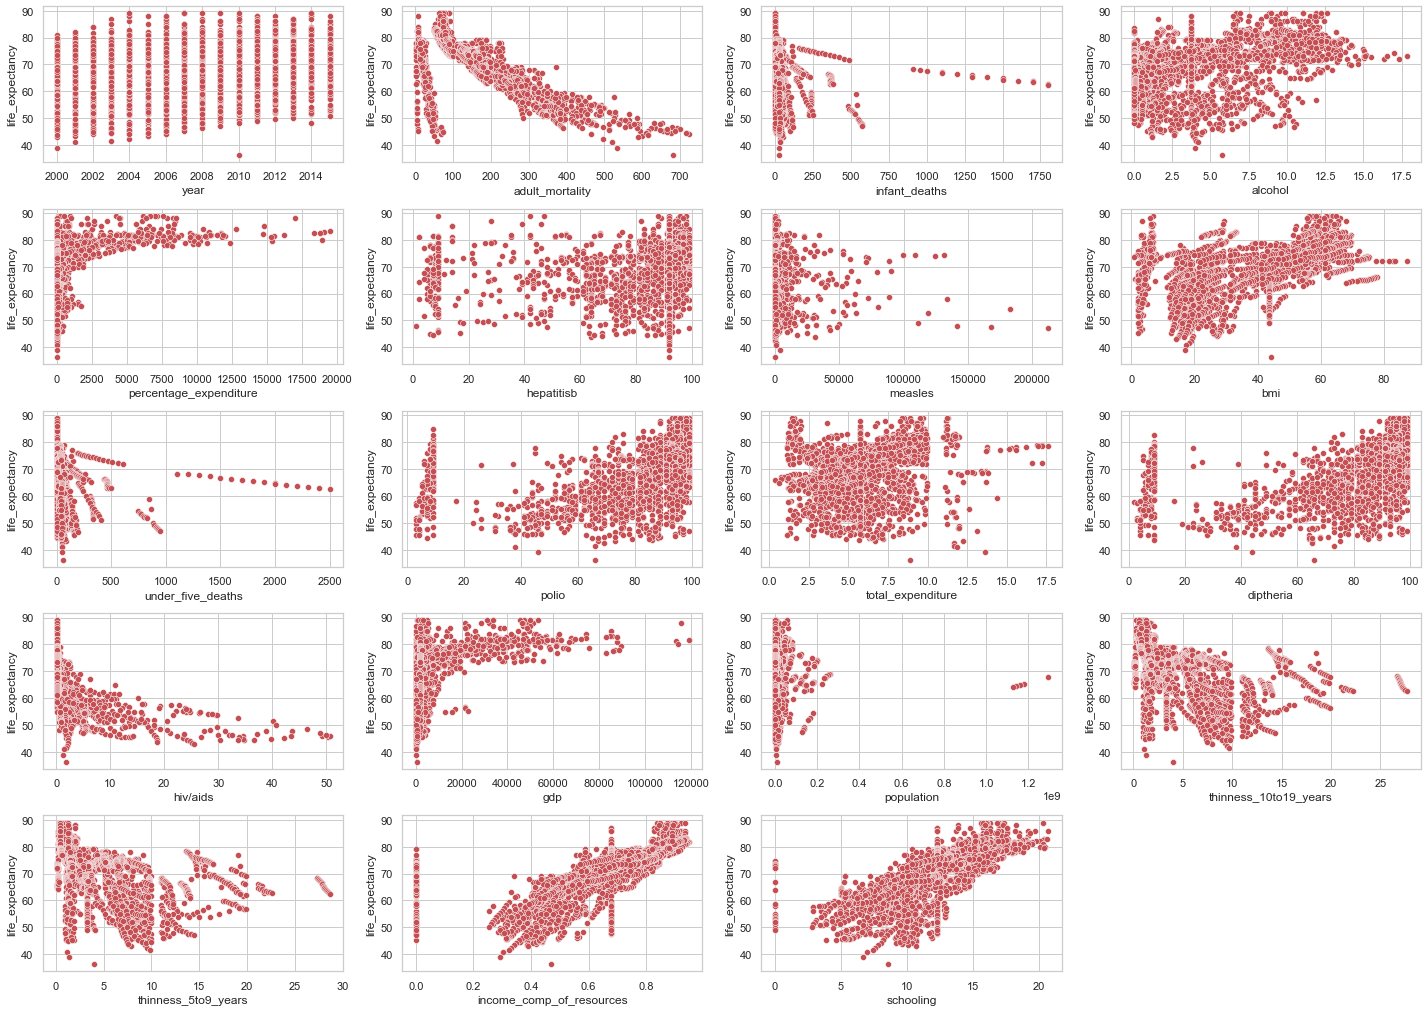

In [ ]:

new_numerical = numerical_columns.drop(['life_expectancy'], axis=1);
fig = plt.figure(figsize = (20,25))
sns.set(style = 'whitegrid')
for i in range(len(new_numerical.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.scatterplot(new_numerical.iloc[:,i], df['life_expectancy'],color='r')
plt.tight_layout()

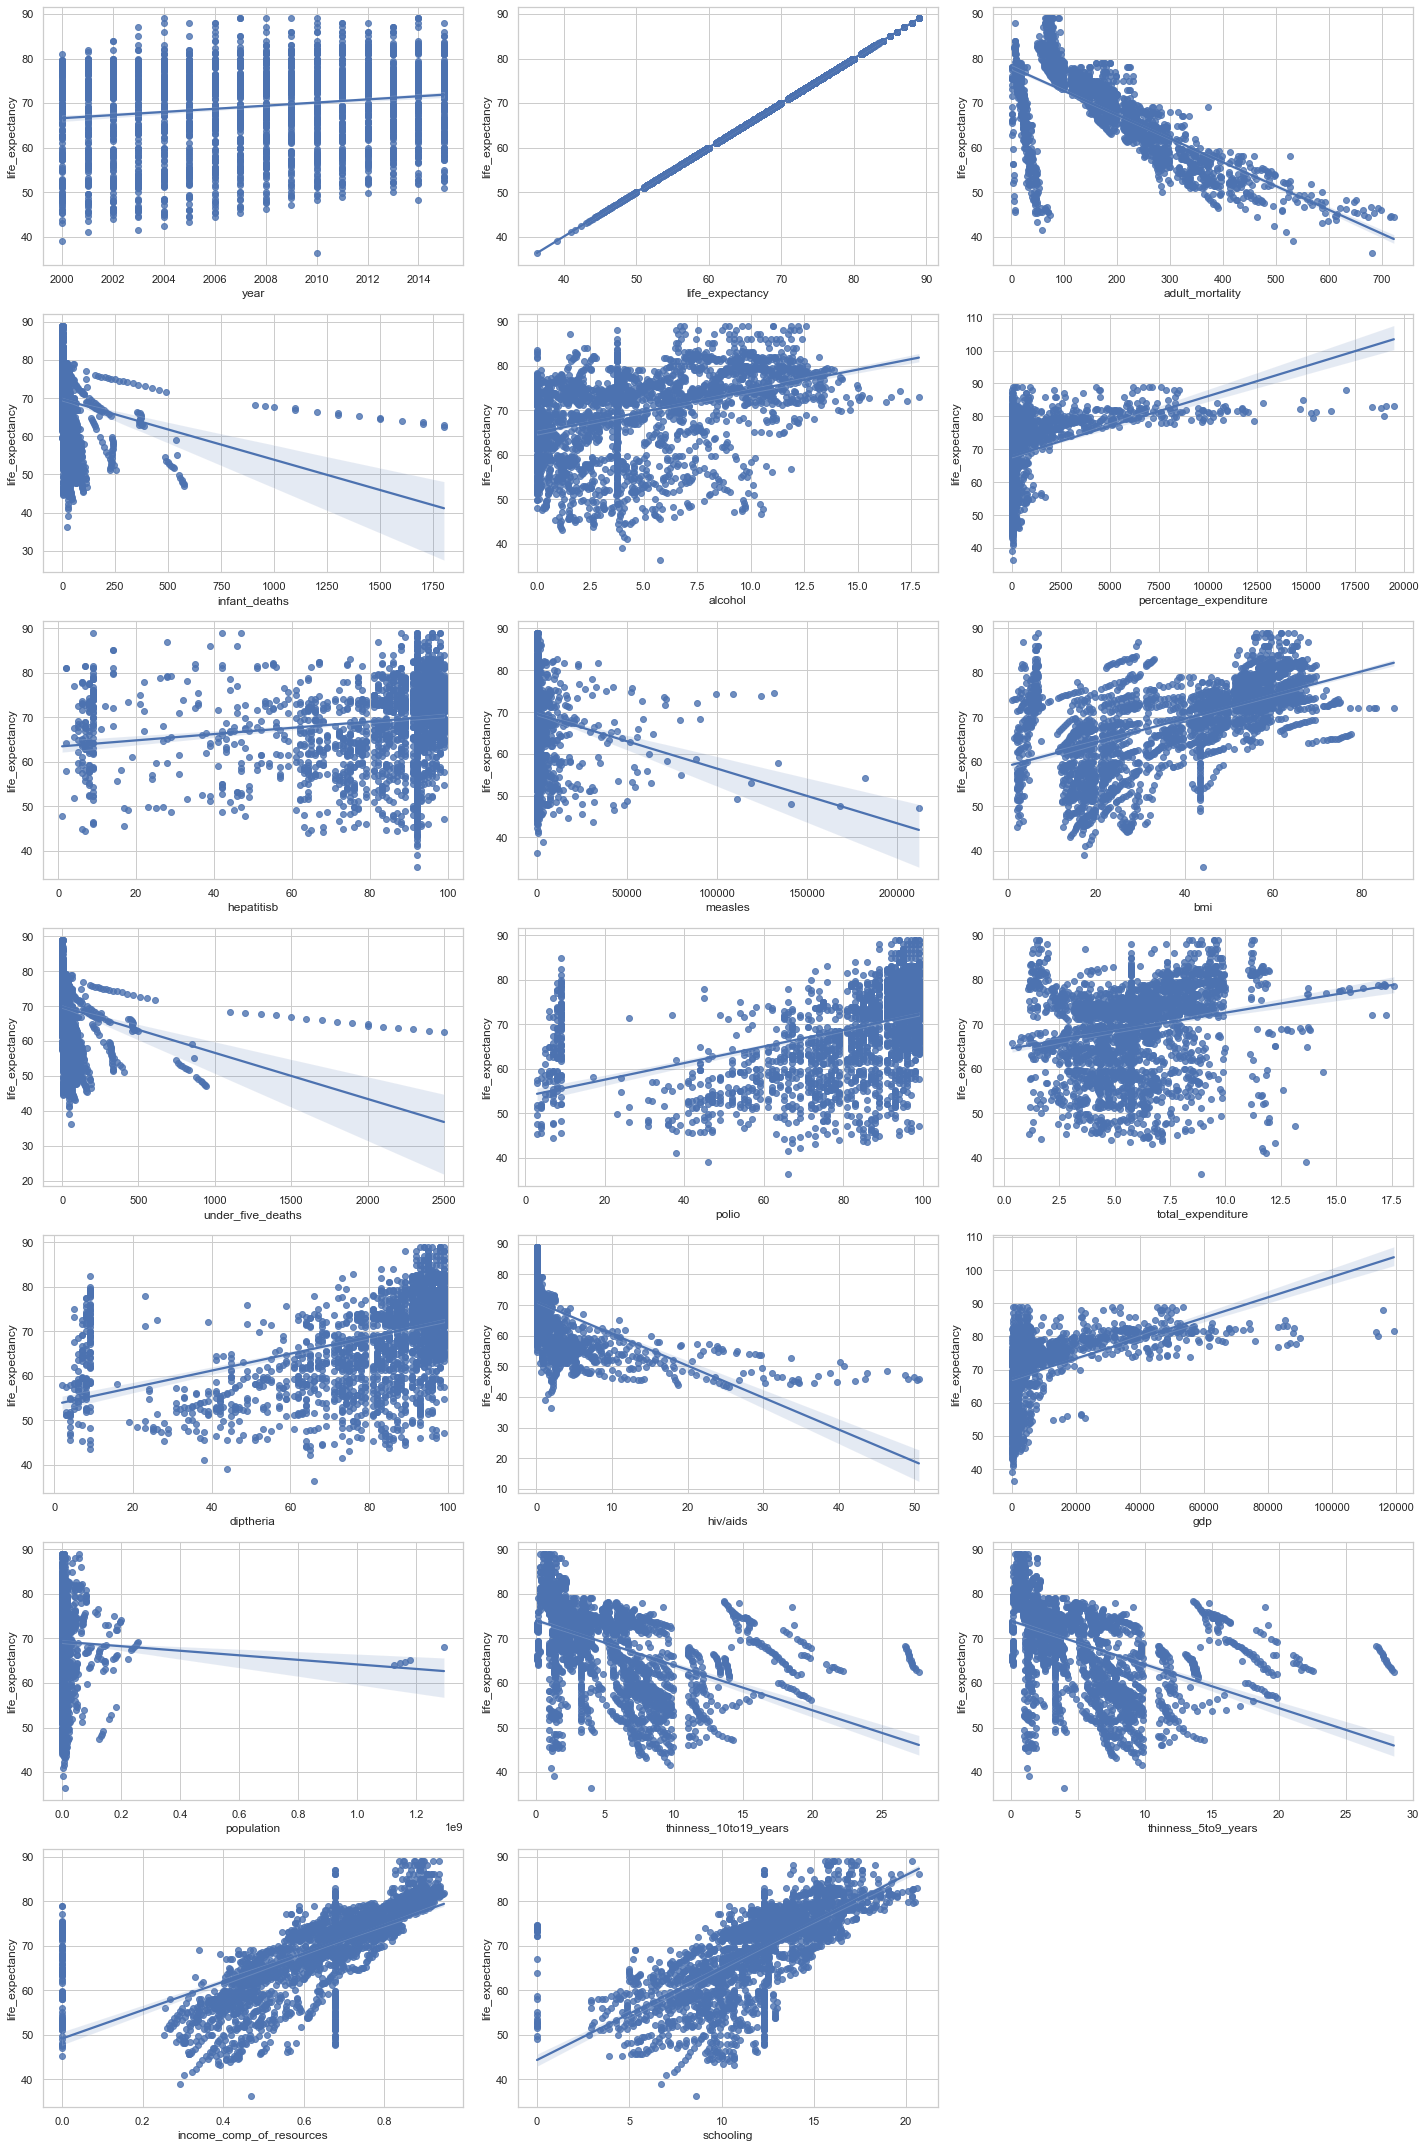

In [ ]:

fig = plt.figure(figsize = (20,30))
for i in range(len(numerical_columns.columns)):
    fig.add_subplot(7, 3, i+1)
    sns.regplot(numerical_columns.iloc[:,i], numerical_columns['life_expectancy'])
plt.tight_layout()

**Correlation**


In [ ]:

corelation = df.corr()
corelation

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitisb,measles,bmi,under_five_deaths,polio,total_expenditure,diptheria,hiv/aids,gdp,population,thinness_10to19_years,thinness_5to9_years,income_comp_of_resources,schooling
year,1.000000,0.170819,-0.079535,-0.037415,-0.069147,0.031400,0.021302,-0.082493,0.108484,-0.042937,0.091388,0.074552,0.131373,-0.139741,0.091480,0.014027,-0.047827,-0.050859,0.236594,0.203517
life_expectancy,0.170819,1.000000,-0.696390,-0.196769,0.388918,0.381418,0.170219,-0.157767,0.556901,-0.222738,0.458399,0.208844,0.472211,-0.556703,0.430461,-0.029014,-0.468002,-0.462473,0.688662,0.713054
adult_mortality,-0.079535,-0.696390,1.000000,0.078890,-0.190191,-0.242628,-0.123287,0.031293,-0.379092,0.094280,-0.270002,-0.111796,-0.270301,0.523886,-0.281434,-0.005292,0.296135,0.301634,-0.436332,-0.433415
infant_deaths,-0.037415,-0.196769,0.078890,1.000000,-0.112918,-0.085612,-0.167421,0.501128,-0.226796,0.996629,-0.170896,-0.126268,-0.175376,0.025231,-0.102829,0.551667,0.464811,0.470445,-0.141571,-0.190951
alcohol,-0.069147,0.388918,-0.190191,-0.112918,1.000000,0.344410,0.090850,-0.049752,0.313022,-0.109790,0.211744,0.296153,0.212388,-0.046235,0.313060,-0.026836,-0.413021,-0.402034,0.418372,0.498899
percentage_expenditure,0.031400,0.381418,-0.242628,-0.085612,0.344410,1.000000,0.039528,-0.056596,0.227408,-0.087852,0.146148,0.175559,0.142506,-0.097857,0.901819,-0.016888,-0.249610,-0.251144,0.374730,0.386076
hepatitisb,0.021302,0.170219,-0.123287,-0.167421,0.090850,0.039528,1.000000,-0.073021,0.112441,-0.170549,0.364890,0.055988,0.449151,-0.085497,0.076660,-0.125006,-0.097576,-0.100576,0.117652,0.141275
measles,-0.082493,-0.157767,0.031293,0.501128,-0.049752,-0.056596,-0.073021,1.000000,-0.176069,0.507809,-0.136669,-0.104133,-0.142385,0.030899,-0.069253,0.237188,0.224870,0.221138,-0.111089,-0.120799
bmi,0.108484,0.556901,-0.379092,-0.226796,0.313022,0.227408,0.112441,-0.176069,1.000000,-0.237048,0.281260,0.230745,0.280267,-0.243383,0.273932,-0.069667,-0.532487,-0.539365,0.471947,0.499806
under_five_deaths,-0.042937,-0.222738,0.094280,0.996629,-0.109790,-0.087852,-0.170549,0.507809,-0.237048,1.000000,-0.188864,-0.127960,-0.195808,0.038062,-0.106093,0.539260,0.466697,0.471167,-0.159264,-0.206242


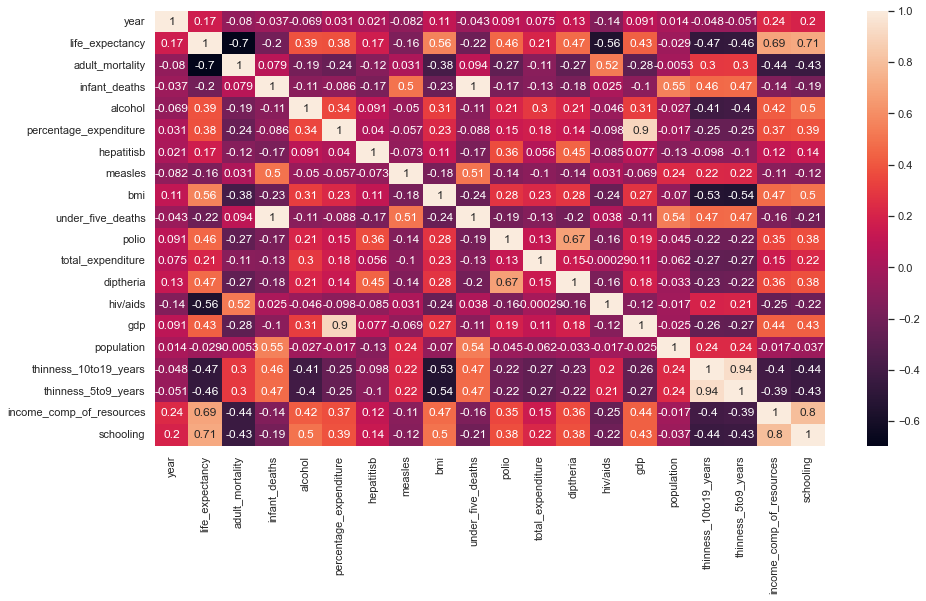

In [ ]:

plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)

In [ ]:
df = df.drop(['thinness_5to9_years','gdp','infant_deaths'],axis=1)

In [ ]:
nominal_df = df[['country']]#ONE HOT ENCODING
nominal_df.head()

,country
0,Afghanistan
1,Afghanistan
2,Afghanistan
3,Afghanistan
4,Afghanistan


In [ ]:
nominal_df = pd.get_dummies(data=nominal_df, drop_first=True)
nominal_df.head()
nominal_df['country_Albania'].unique()

array([0, 1], dtype=uint8)

In [ ]:
nominal_df.shape

(2938, 192)

In [ ]:

df.drop(['country'],axis = 1, inplace= True)
df = df.join(nominal_df)
df.head()

,year,status,life_expectancy,adult_mortality,alcohol,percentage_expenditure,hepatitisb,measles,bmi,under_five_deaths,...,country_United Republic of Tanzania,country_United States of America,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela (Bolivarian Republic of),country_Viet Nam,country_Yemen,country_Zambia,country_Zimbabwe
0,2015,Developing,65.0,263.0,0.01,71.279624,65.0,1154,19.1,83,...,0,0,0,0,0,0,0,0,0,0
1,2014,Developing,59.9,271.0,0.01,73.523582,62.0,492,18.6,86,...,0,0,0,0,0,0,0,0,0,0
2,2013,Developing,59.9,268.0,0.01,73.219243,64.0,430,18.1,89,...,0,0,0,0,0,0,0,0,0,0
3,2012,Developing,59.5,272.0,0.01,78.184215,67.0,2787,17.6,93,...,0,0,0,0,0,0,0,0,0,0
4,2011,Developing,59.2,275.0,0.01,7.097109,68.0,3013,17.2,97,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(2938, 210)

In [ ]:
from sklearn.preprocessing import LabelEncoder
ordinal_df= df[['status']]
ordinal_df = ordinal_df.apply(LabelEncoder().fit_transform)
ordinal_df.head()

,status
0,1
1,1
2,1
3,1
4,1


In [ ]:

df.drop(ordinal_df.columns, axis = 1, inplace = True)
df = df.join(ordinal_df)
df.head()

,year,life_expectancy,adult_mortality,alcohol,percentage_expenditure,hepatitisb,measles,bmi,under_five_deaths,polio,...,country_United States of America,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela (Bolivarian Republic of),country_Viet Nam,country_Yemen,country_Zambia,country_Zimbabwe,status
0,2015,65.0,263.0,0.01,71.279624,65.0,1154,19.1,83,6.0,...,0,0,0,0,0,0,0,0,0,1
1,2014,59.9,271.0,0.01,73.523582,62.0,492,18.6,86,58.0,...,0,0,0,0,0,0,0,0,0,1
2,2013,59.9,268.0,0.01,73.219243,64.0,430,18.1,89,62.0,...,0,0,0,0,0,0,0,0,0,1
3,2012,59.5,272.0,0.01,78.184215,67.0,2787,17.6,93,67.0,...,0,0,0,0,0,0,0,0,0,1
4,2011,59.2,275.0,0.01,7.097109,68.0,3013,17.2,97,68.0,...,0,0,0,0,0,0,0,0,0,1


**Train** **Test** **Split**

In [ ]:
Y = df['life_expectancy']
X = df.drop(['life_expectancy'],axis=1)
print(X)

      year  adult_mortality  alcohol  percentage_expenditure  hepatitisb  \
0     2015            263.0     0.01               71.279624        65.0   
1     2014            271.0     0.01               73.523582        62.0   
2     2013            268.0     0.01               73.219243        64.0   
3     2012            272.0     0.01               78.184215        67.0   
4     2011            275.0     0.01                7.097109        68.0   
...    ...              ...      ...                     ...         ...   
2933  2004            723.0     4.36                0.000000        68.0   
2934  2003            715.0     4.06                0.000000         7.0   
2935  2002             73.0     4.43                0.000000        73.0   
2936  2001            686.0     1.72                0.000000        76.0   
2937  2000            665.0     1.68                0.000000        79.0   

      measles   bmi  under_five_deaths  polio  total_expenditure  ...  \
0        1154 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.2,random_state=42)

In [ ]:
X_train.shape

(2350, 209)

In [ ]:
X_test.shape

(588, 209)

In [ ]:
print(X_train)

      year  adult_mortality  alcohol  percentage_expenditure  hepatitisb  \
456   2007            126.0     5.28              345.463714        96.0   
462   2001            152.0     3.81              150.743486        92.0   
2172  2011            143.0    10.43                0.000000        99.0   
2667  2013             13.0     1.29              594.645310        98.0   
381   2002             95.0     0.13              941.703687        99.0   
...    ...              ...      ...                     ...         ...   
1638  2011             59.0     6.91             3601.287457        82.0   
1095  2010            287.0     3.21               53.307827        83.0   
1130  2007            266.0     6.08               56.778587        92.0   
1294  2003             72.0     9.30             3519.258515        95.0   
860   2005             34.0     1.07                5.064689        96.0   

      measles   bmi  under_five_deaths  polio  total_expenditure  ...  \
456         0 

## MODELS

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import  mean_squared_error
from sklearn.metrics import r2_score

**Random Forest Model**

In [ ]:
#Random Forest Model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train,Y_train)

#Make Predictions
rf_reg_testpred = rf_reg.predict(X_test)
rf_reg_trainpred = rf_reg.predict(X_train)

#Calculating MSE and RMSE
rf_train_mse = round(mean_squared_error(Y_train, rf_reg_trainpred),4)
rf_train_mae = round(mean_absolute_error(Y_train, rf_reg_trainpred),4)
rf_train_R2 = round(r2_score(Y_train,  rf_reg_trainpred),4)
rf_test_mse = round(mean_squared_error(Y_test, rf_reg_testpred),4)
rf_test_mae = round(mean_absolute_error(Y_test, rf_reg_testpred),4)
rf_test_R2= round(r2_score(Y_test,  rf_reg_testpred),4)



print("Mean Squared Error of Random Forest for Training: ",rf_train_mse)
print()
print("Mean Absolute Error of Random Forest for Training: ",rf_train_mae)
print()
print("R2 Score of Random Forest for Training: ",rf_train_R2)
print()
print("Mean Squared Error of Random Forest for Test: ",rf_test_mse)
print()
print("Mean Absolute Error of Random Forest for Test: ",rf_test_mae)
print()
print("R2 Score of Random Forest for Test: ",rf_test_R2)





Mean Squared Error of Random Forest for Training:  0.4682

Mean Absolute Error of Random Forest for Training:  0.4129

R2 Score of Random Forest for Training:  0.9949

Mean Squared Error of Random Forest for Test:  2.6083

Mean Absolute Error of Random Forest for Test:  1.0376

R2 Score of Random Forest for Test:  0.9699


**KNeighbors Model**

In [ ]:
#KNN Model
knn_reg = KNeighborsRegressor(n_neighbors=10)
knn_reg.fit(X_train, Y_train)

#Make Predictions
knn_reg_testpred = knn_reg.predict(X_test)
knn_reg_trainpred = knn_reg.predict(X_train)

#Calculating MSE and RMSE
mse_1 = round(mean_squared_error(Y_train, knn_reg_trainpred),4)
mae_1 = round(mean_absolute_error(Y_train, knn_reg_trainpred),4)
r2_score_1 = round(r2_score(Y_train,  knn_reg_trainpred),4)
mse_2 = round(mean_squared_error(Y_test, knn_reg_testpred),4)
mae_2 = round(mean_absolute_error(Y_test, knn_reg_testpred),4)
r2_score_2 = round(r2_score(Y_test,  knn_reg_testpred),4)


print("Mean Squared Error of KNN for Training: ",mse_1)
print()
print("Mean Absolute Error of KNN for Training: ",mae_1)
print()
print("R2 Score of KNN for Training: ",r2_score_1)
print()
print("Mean Squared Error of KNN for Test: ",mse_2)
print()
print("Mean Absolute Error of KNN for Test: ",mae_2)
print()
print("R2 Score of KNN for Test: ",r2_score_2)


Mean Squared Error of KNN for Training:  63.8629

Mean Absolute Error of KNN for Training:  6.012

R2 Score of KNN for Training:  0.3006

Mean Squared Error of KNN for Test:  78.6277

Mean Absolute Error of KNN for Test:  6.6727

R2 Score of KNN for Test:  0.0928


**Decision Tree Model**

In [ ]:
#Decision Tree Regressor
dt_reg = DecisionTreeRegressor(max_depth=5,min_samples_leaf=7)
dt_reg.fit(X_train, Y_train)

#Make Predictions
dt_reg_testpred = dt_reg.predict(X_test)
dt_reg_trainpred = dt_reg.predict(X_train)

#Calculating MSE, MAE and R2
dt_train_mse = round(mean_squared_error(Y_train, dt_reg_trainpred),4)
dt_train_mae = round(mean_absolute_error(Y_train, dt_reg_trainpred),4)
dt_train_R2= round(r2_score(Y_train,  dt_reg_trainpred),4)
dt_test_mse = round(mean_squared_error(Y_test, dt_reg_testpred),4)
dt_test_mae = round(mean_absolute_error(Y_test, dt_reg_testpred),4)
dt_test_R2 = round(r2_score(Y_test,  dt_reg_testpred),4)


print("Mean Squared Error of Decision Tree for Training: ",dt_train_mse)
print()
print("Mean Absolute Error of Decision Tree for Training: ",dt_train_mae )
print()
print("R2 Score of Decision Tree for Training: ",dt_train_R2)
print()
print("Mean Squared Error of Decision Tree for Test: ",dt_test_mse)
print()
print("Mean Absolute Error of Decision Tree for Test: ",dt_test_mae)
print()
print("R2 Score of Decision Tree for Test: ",dt_test_R2)


Mean Squared Error of Decision Tree for Training:  7.6545

Mean Absolute Error of Decision Tree for Training:  2.0252

R2 Score of Decision Tree for Training:  0.9162

Mean Squared Error of Decision Tree for Test:  8.1987

Mean Absolute Error of Decision Tree for Test:  2.1225

R2 Score of Decision Tree for Test:  0.9054


**Gradient Boosting Model**

In [ ]:
#Gradient Boosting Regressor Model
gb_reg = GradientBoostingRegressor(n_estimators=200,max_depth=3)
gb_reg.fit(X_train, Y_train)

#Make Predictions
gb_reg_testpred = gb_reg.predict(X_test)
gb_reg_trainpred = gb_reg.predict(X_train)

#Calculating MSE and RMSE

gb_train_mse = round(mean_squared_error(Y_train, gb_reg_trainpred),4)
gb_train_mae = round(mean_absolute_error(Y_train, gb_reg_trainpred),4)
gb_train_R2 = round(r2_score(Y_train,  gb_reg_trainpred),4)
gb_test_mse= round(mean_squared_error(Y_test, gb_reg_testpred),4)
gb_test_mae = round(mean_absolute_error(Y_test, gb_reg_testpred),4)
gb_test_R2 = round(r2_score(Y_test,  gb_reg_testpred),4)


print("Mean Squared Error of Gradient Boosting for Training: ",gb_train_mse)
print()
print("Mean Absolute Error of Gradient Boosting for Training: ",gb_train_mae)
print()
print("R2 Score of Gradient Boosting for Training: ",gb_train_R2)
print()
print("Mean Squared Error of Gradient Boosting for Test: ",gb_test_mse)
print()
print("Mean Absolute Error of Gradient Boosting for Test: ",gb_test_mae)
print()
print("R2 Score of Gradient Boosting for Test: ",gb_test_R2 )

Mean Squared Error of Gradient Boosting for Training:  2.8319

Mean Absolute Error of Gradient Boosting for Training:  1.198

R2 Score of Gradient Boosting for Training:  0.969

Mean Squared Error of Gradient Boosting for Test:  3.7818

Mean Absolute Error of Gradient Boosting for Test:  1.4007

R2 Score of Gradient Boosting for Test:  0.9564


**Cross Validation**

In [ ]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=0, shuffle=True) # k=10, split the data into 10 equal parts
xyz=[]
std=[]
predictive_models=['Random Forest','KNN','Decision Tree','Gradient Boosting Regressor']
models=[RandomForestRegressor(n_estimators=100, random_state=42), KNeighborsRegressor(n_neighbors=10), DecisionTreeRegressor(max_depth=5,min_samples_leaf=7), GradientBoostingRegressor(n_estimators=200,max_depth=3)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X_train,Y_train, cv = kfold, scoring="r2")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
   
new_models_dataframe2=pd.DataFrame({'CV R2 Mean':xyz,'Std':std},index=predictive_models)       
new_models_dataframe2

,CV R2 Mean,Std
Random Forest,0.961226,0.007889
KNN,0.133546,0.056774
Decision Tree,0.892720,0.015107
Gradient Boosting Regressor,0.949850,0.007299


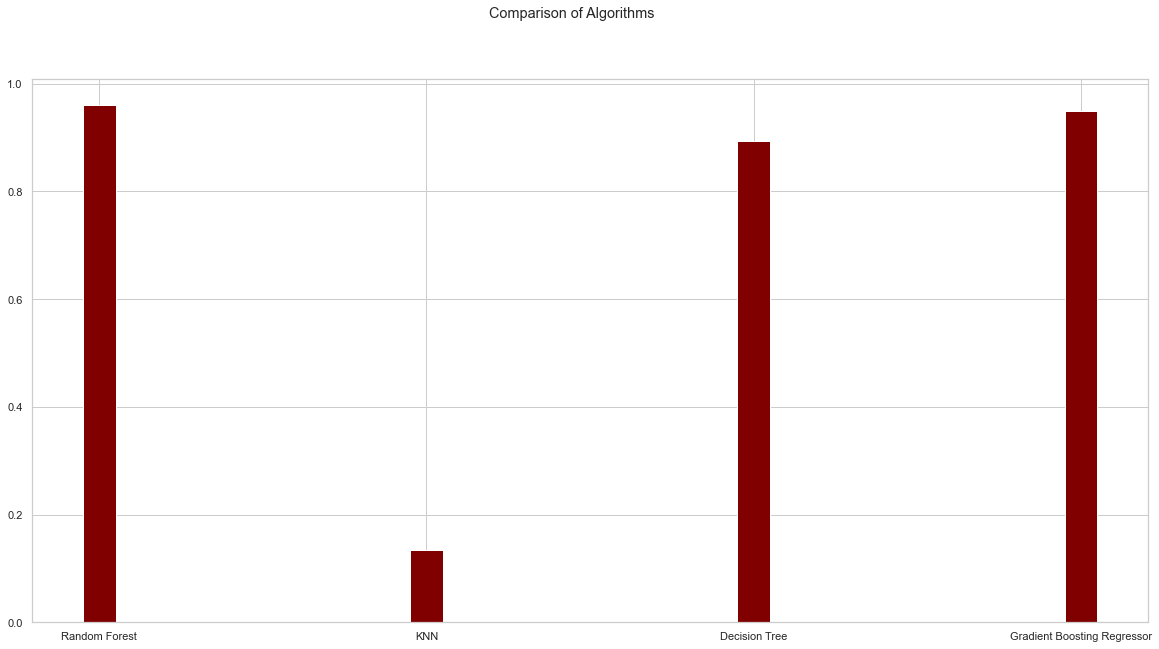

In [ ]:
fig = plt.figure(figsize=(20,10))
fig.suptitle('Comparison of Algorithms')
cv_results = []
for i in range(len(cv_results)):
    cv_results.append(cv_results[i][1])
plt.bar(predictive_models, xyz, color ='maroon', width=0.10)
plt.show()

In [ ]:
lis=[]
cols=list(df.columns)
cols.remove('life_expectancy')

j=0
print("ENTER COUNTRY")
country=input()

for i in cols:
    if j==16:
        break
    j+=1
    print("Enter values of "+i)
    lis.append(float(input()))
print(lis)
for i in cols[16:]:
    if country.lower() in i.lower():
        lis.append(1)
    else:
        lis.append(0)
print(lis)

In [ ]:
df_test=pd.DataFrame([lis], columns=cols)
df_test

In [ ]:
rf_reg_testpred = rf_reg.predict(df_test)
rf_reg_testpred

In [ ]:
# knn_reg_testpred = knn_reg.predict(df_test)
# knn_reg_testpred

In [ ]:
# dt_reg_testpred = dt_reg.predict(df_test)
# dt_reg_testpred

In [ ]:
# gb_reg_testpred = gb_reg.predict(df_test)
# gb_reg_testpred